# Face Recognition (GOOGLE COLAB)

In [1]:
!nvidia-smi

Sun Jun 14 07:45:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    13W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [0]:
%tensorflow_version 2.x

In [0]:
!pip install -q keras==2.3.0

In [4]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.0


In [0]:
from keras.preprocessing import image as kimage
from keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# (Mount Google Drive)



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Split pictures folder in train/test/val

(if not done already)

In [0]:
# import sys
# sys.path.insert(1, '/content/drive/My Drive/Images/')

In [0]:
# import utils_2d

In [0]:
# # Creating Train / Val / Test folders (One time use)
# root_dir = '/content/drive/My Drive/2D/pictures_masked_resized_heavy'
# dest_dir = '/content/drive/My Drive/2D/pictures_masked_resized_heavy_split'

In [0]:
#!ls "$root_dir"

In [0]:
# utils_2d.pictures_train_test_val_split(root_dir, dest_dir, verbose=True)

### Extract train/test/val folders (if not already there; alternative to previous step)

In [0]:
# !tar xzvf "/content/drive/My Drive/2D/pictures_masked_new_split.tar.gz" -C "/content/drive/My Drive/2D/"

# Define Train/test/val sets

In [0]:
#my_pictures_dir ="/content/drive/My Drive/2D/pictures_masked_resized_heavy_split"
my_pictures_dir ="/content/drive/My Drive/2D/pictures_masked_new_split"

In [0]:
train_dir = my_pictures_dir+"/train"
val_dir = my_pictures_dir+"/val"
test_dir = my_pictures_dir+"/test"

In [16]:
!ls "$my_pictures_dir/test"

alessandro  alinda  cami  gian	khaled	luca  mamma  papi


Set the classes that the classifier should learn:

In [0]:
classes = ["alessandro", "alinda", "cami", "gian", "khaled", "mamma", "papi"]

In [0]:
color_mode = "grayscale"

## Sample from train set

The following is kept commented in case of future testing with featurewise center/std

In [0]:
# sample_processing = kimage.ImageDataGenerator()
# sample_generator = sample_processing.flow_from_directory(train_dir, classes = classes,
#                                                          # rescale= 1./255,
#                                                          target_size=(224, 224),
#                                                          color_mode=color_mode,
#                                                          batch_size=64,
#                                                          class_mode="categorical",
#                                                          shuffle=True,
#                                                          seed=1)

In [0]:
# sample = sample_generator.next()
# sample_features = sample[0]
# sample_labels = sample[1]

In [0]:
# plt.imshow(sample_features[5][:,:,0], cmap="gray")

## Generators

In [0]:
train_processing = kimage.ImageDataGenerator(
    # featurewise_center=True, # UNCOMMENT for testing with previous code
    # featurewise_std_normalization=True, # UNCOMMENT for testing with previous
    rescale= 1./255, # COMMENT for testing with previous
    # Rotations
    # rotation_range=10,
    # # Shifts
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # # Flips
    horizontal_flip=True,
    # vertical_flip=True,
    # Brightness Change
    brightness_range=[0.6,1.4],
    # Zoom Change
    # zoom_range=[0.9,1.1] # TODO: test without this
)

In [0]:
# train_processing.fit(sample_features) # UNCOMMENT for testing with previous code

In [0]:
# train_processing.mean

In [25]:
train_generator = train_processing.flow_from_directory(train_dir,
                                                       classes = classes,
                                                       target_size=(224, 224),
                                                       color_mode=color_mode,
                                                       batch_size=32,
                                                       class_mode="categorical",
                                                       shuffle=True,
                                                       seed=1)

Found 2247 images belonging to 7 classes.


In [26]:
labels_to_text = [i[0] for i in train_generator.class_indices.items()]
labels_to_text

['alessandro', 'alinda', 'cami', 'gian', 'khaled', 'mamma', 'papi']

In [27]:
test_processing = kimage.ImageDataGenerator(# featurewise_center=True,
                                            # featurewise_std_normalization=True
                                            rescale = 1./255,
                                            )
# test_processing.fit(sample_features) # UNCOMMENT for testing with previous code

val_generator = test_processing.flow_from_directory(val_dir,
                                                    classes = classes,
                                                    target_size=(224, 224),
                                                    color_mode=color_mode,
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=False,
                                                    seed=1)

test_generator = test_processing.flow_from_directory(test_dir,
                                                     classes = classes,
                                                     target_size=(224, 224),
                                                     color_mode=color_mode,
                                                     batch_size=32,
                                                     class_mode="categorical",
                                                     shuffle=False,
                                                     seed=1)

Found 644 images belonging to 7 classes.
Found 322 images belonging to 7 classes.


In [28]:
n_classes = (train_generator.num_classes)
n_classes

7

### See images

In [0]:
batch = np.array(train_generator.next()[0])

In [30]:
batch.shape

(32, 224, 224, 1)

In [0]:
# mu = train_processing.mean # UNCOMMENT for testing with previous code
# sigma = train_processing.std # UNCOMMENT for testing with previous code

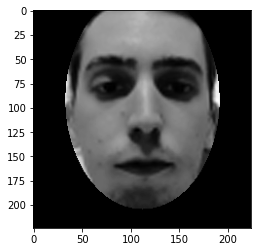

In [32]:
pic = batch[6]
# plt.imshow(((pic*sigma + mu)/255)[:,:,0], cmap="gray")
plt.imshow(pic[:,:,0], cmap="gray")
plt.show()

In [33]:
input_shape = pic.shape
input_shape

(224, 224, 1)

# Net

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
net = Sequential()
#add model layers
net.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
net.add(Conv2D(32, kernel_size=3, activation='relu'))
net.add(Flatten())
net.add(Dense(n_classes, activation='softmax'))

In [0]:
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=["accuracy"])

In [0]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         restore_best_weights=True, patience=5)

In [37]:
history = net.fit_generator(train_generator,
                  verbose=1,
                  epochs=50,
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  callbacks=[callback],
                  validation_data=val_generator)

Epoch 1/50
70/70 [==============================] - 12s 170ms/step - loss: 3.0122 - accuracy: 0.6361 - val_loss: 0.0219 - val_accuracy: 0.8835
Epoch 2/50
70/70 [==============================] - 8s 116ms/step - loss: 0.3292 - accuracy: 0.9129 - val_loss: 0.0141 - val_accuracy: 0.9550
Epoch 3/50
70/70 [==============================] - 8s 113ms/step - loss: 0.1983 - accuracy: 0.9531 - val_loss: 0.0166 - val_accuracy: 0.9783
Epoch 4/50
70/70 [==============================] - 8s 116ms/step - loss: 0.2276 - accuracy: 0.9699 - val_loss: 0.0162 - val_accuracy: 0.7376
Epoch 5/50
70/70 [==============================] - 8s 113ms/step - loss: 0.3067 - accuracy: 0.9670 - val_loss: 2.0564e-06 - val_accuracy: 0.9876
Epoch 6/50
70/70 [==============================] - 8s 116ms/step - loss: 0.0630 - accuracy: 0.9896 - val_loss: 1.9495e-04 - val_accuracy: 0.9907
Epoch 7/50
70/70 [==============================] - 8s 114ms/step - loss: 0.0637 - accuracy: 0.9865 - val_loss: 2.4884e-05 - val_accuracy: 

# Save Model

In [0]:
import os

In [0]:
latest_model_number = max([int(e.split("_")[0]) for e in os.listdir("/content/drive/My Drive/2D/models/")])

In [0]:
model_name = latest_model_number + 1

In [41]:
model_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.h5"
json_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.json"
model_filename, json_filename

('/content/drive/My Drive/2D/models/24_model.h5',
 '/content/drive/My Drive/2D/models/24_model.json')

In [0]:
# mu = list(train_processing.mean[0][0])
# std = list(train_processing.std[0][0])

In [43]:
d = {}
# d["mean"] = [str(i) for i in mu]
# d["std"] = [str(i) for i in std]
d["mask"] = True
d["model_n"] = model_name
d["featurewise_center"] = False
d["featurewise_std"] = False
d["class_indices"] = [i[0] for i in train_generator.class_indices.items()]
d["description"] = "Base model, new preprocessing steps order, new_width = 100"
d

{'class_indices': ['alessandro',
  'alinda',
  'cami',
  'gian',
  'khaled',
  'mamma',
  'papi'],
 'description': 'Base model, new preprocessing steps order, new_width = 100',
 'featurewise_center': False,
 'featurewise_std': False,
 'mask': True,
 'model_n': 24}

In [0]:
import json

In [0]:
with open(json_filename, "w") as jsonf:
    json.dump(d, jsonf)

In [0]:
net.save(model_filename)

### Evaluation


In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

In [48]:
net.evaluate_generator(train_generator)

[2.0587662220350467e-05, 0.9991099238395691]

In [49]:
net.evaluate_generator(val_generator)

[2.9802320611338473e-08, 0.9906832575798035]

In [0]:
net.evaluate_generator(test_generator)

In [0]:
def classification_report_generator(generator):
  # should not be applied to generators with shuffle = True
  preds = net.predict_generator(generator)
  preds = np.argmax(preds, axis=1)
  real = generator.classes
  ind_dict = generator.class_indices
  num_to_label = [i[0] for i in ind_dict.items()]
  cmat = cm(real, preds)
  cr = classification_report(real, preds, target_names=num_to_label)
  return cmat, cr

In [51]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       0.99      1.00      0.99        92
      alinda       1.00      1.00      1.00        92
        cami       1.00      0.99      0.99        92
        gian       1.00      0.98      0.99        92
      khaled       0.97      0.98      0.97        92
       mamma       1.00      1.00      1.00        92
        papi       0.98      0.99      0.98        92

    accuracy                           0.99       644
   macro avg       0.99      0.99      0.99       644
weighted avg       0.99      0.99      0.99       644



In [52]:
cm_val, cr_val = classification_report_generator(test_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       0.94      1.00      0.97        46
      alinda       0.98      1.00      0.99        46
        cami       1.00      0.93      0.97        46
        gian       1.00      1.00      1.00        46
      khaled       1.00      0.98      0.99        46
       mamma       0.98      1.00      0.99        46
        papi       1.00      0.98      0.99        46

    accuracy                           0.98       322
   macro avg       0.99      0.98      0.98       322
weighted avg       0.99      0.98      0.98       322



# Alternative model
For reducing a bit the dimensionality inside the network I will add a MaxPooling layer before the dense one, let's see the performances:

In [0]:
from keras.layers import MaxPooling2D
#create model
net = Sequential()
#add model layers
net.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
net.add(Conv2D(32, kernel_size=3, activation='relu'))
net.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))
net.add(Flatten())
net.add(Dense(n_classes, activation='softmax'))

In [54]:
print(net.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 64)      640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 380192)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 2661351   
Total params: 2,680,455
Trainable params: 2,680,455
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=["accuracy"])

In [56]:
history = net.fit_generator(train_generator,
                  verbose=1,
                  epochs=50,
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  callbacks=[callback],
                  validation_data=val_generator)

Epoch 1/50
70/70 [==============================] - 8s 117ms/step - loss: 1.7905 - accuracy: 0.6284 - val_loss: 0.7942 - val_accuracy: 0.8820
Epoch 2/50
70/70 [==============================] - 8s 119ms/step - loss: 0.2761 - accuracy: 0.9300 - val_loss: 6.2366e-04 - val_accuracy: 0.9457
Epoch 3/50
70/70 [==============================] - 8s 114ms/step - loss: 0.1105 - accuracy: 0.9716 - val_loss: 9.7170e-05 - val_accuracy: 0.9829
Epoch 4/50
70/70 [==============================] - 8s 115ms/step - loss: 0.0525 - accuracy: 0.9856 - val_loss: 1.8511e-04 - val_accuracy: 0.9891
Epoch 5/50
70/70 [==============================] - 8s 116ms/step - loss: 0.0664 - accuracy: 0.9824 - val_loss: 4.5895e-06 - val_accuracy: 0.9922
Epoch 6/50
70/70 [==============================] - 8s 113ms/step - loss: 0.0780 - accuracy: 0.9865 - val_loss: 1.1623e-06 - val_accuracy: 0.9953
Epoch 7/50
70/70 [==============================] - 8s 117ms/step - loss: 0.0366 - accuracy: 0.9878 - val_loss: 1.1921e-07 - val

In [57]:
net.evaluate_generator(train_generator)

[1.4900429050612729e-05, 0.9991099238395691]

In [58]:
net.evaluate_generator(val_generator)

[0.0, 0.9953415989875793]

In [59]:
net.evaluate_generator(test_generator)

[0.0, 0.9906832575798035]

In [60]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        92
      alinda       1.00      1.00      1.00        92
        cami       1.00      1.00      1.00        92
        gian       1.00      1.00      1.00        92
      khaled       0.99      0.98      0.98        92
       mamma       0.99      0.99      0.99        92
        papi       0.99      1.00      0.99        92

    accuracy                           1.00       644
   macro avg       1.00      1.00      1.00       644
weighted avg       1.00      1.00      1.00       644



In [61]:
cm_val, cr_val = classification_report_generator(test_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        46
      alinda       0.98      0.98      0.98        46
        cami       1.00      1.00      1.00        46
        gian       1.00      1.00      1.00        46
      khaled       0.98      0.98      0.98        46
       mamma       0.98      1.00      0.99        46
        papi       1.00      0.98      0.99        46

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



Training is faster and performance is slightly better.

In [0]:
latest_model_number = max([int(e.split("_")[0]) for e in os.listdir("/content/drive/My Drive/2D/models/")])
model_name = latest_model_number + 1
model_filename = f"/content/drive/My Drive/2D/models/{model_name}_maxpool_model.h5"
json_filename = f"/content/drive/My Drive/2D/models/{model_name}_maxpool_model.json"

In [63]:
model_filename, json_filename

('/content/drive/My Drive/2D/models/25_maxpool_model.h5',
 '/content/drive/My Drive/2D/models/25_maxpool_model.json')

In [64]:
d = {}
# d["mean"] = [str(i) for i in mu]
# d["std"] = [str(i) for i in std]
d["mask"] = True
d["model_n"] = model_name
d["featurewise_center"] = False
d["featurewise_std"] = False
d["class_indices"] = [i[0] for i in train_generator.class_indices.items()]
d["description"] = "Base model + maxpool, new preprocessing order, new_width=100"
d

{'class_indices': ['alessandro',
  'alinda',
  'cami',
  'gian',
  'khaled',
  'mamma',
  'papi'],
 'description': 'Base model + maxpool, new preprocessing order, new_width=100',
 'featurewise_center': False,
 'featurewise_std': False,
 'mask': True,
 'model_n': 25}

In [0]:
with open(json_filename, "w") as jsonf:
    json.dump(d, jsonf)
net.save(model_filename)

In [0]:
copy_of_history = history

Another thing we can try is to double the steps per epoch parameter, so that more horizontal flips and brightness changes are performed

In [0]:
#create model
net = Sequential()
#add model layers
net.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
net.add(Conv2D(32, kernel_size=3, activation='relu'))
net.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))
net.add(Flatten())
net.add(Dense(n_classes, activation='softmax'))
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=["accuracy"])

In [68]:
doubled_steps_per_epoch = 2 * (train_generator.n//train_generator.batch_size)
history = net.fit_generator(train_generator,
                  verbose=1,
                  epochs=50,
                  steps_per_epoch=doubled_steps_per_epoch,
                  callbacks=[callback],
                  validation_data=val_generator)

Epoch 1/50
140/140 [==============================] - 14s 102ms/step - loss: 0.8475 - accuracy: 0.7957 - val_loss: 0.0186 - val_accuracy: 0.9845
Epoch 2/50
140/140 [==============================] - 14s 102ms/step - loss: 0.1204 - accuracy: 0.9758 - val_loss: 0.0020 - val_accuracy: 0.9907
Epoch 3/50
140/140 [==============================] - 14s 102ms/step - loss: 0.0235 - accuracy: 0.9935 - val_loss: 1.0431e-06 - val_accuracy: 0.9845
Epoch 4/50
140/140 [==============================] - 14s 103ms/step - loss: 0.0353 - accuracy: 0.9914 - val_loss: 1.4901e-07 - val_accuracy: 0.9907
Epoch 5/50
140/140 [==============================] - 14s 102ms/step - loss: 0.0229 - accuracy: 0.9937 - val_loss: 4.7684e-07 - val_accuracy: 0.9969
Epoch 6/50
140/140 [==============================] - 14s 103ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 0.9953
Epoch 7/50
140/140 [==============================] - 14s 103ms/step - loss: 0.0113 - accuracy: 0.9977 - val_loss:

In [69]:
net.evaluate_generator(train_generator)

[6.811957575791894e-08, 0.9995549917221069]

In [70]:
net.evaluate_generator(val_generator)

[0.0, 0.9953415989875793]

In [72]:
net.evaluate_generator(test_generator)

[0.0, 0.9937888383865356]

In [71]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        92
      alinda       0.99      1.00      0.99        92
        cami       1.00      1.00      1.00        92
        gian       1.00      1.00      1.00        92
      khaled       0.98      1.00      0.99        92
       mamma       1.00      0.99      0.99        92
        papi       1.00      0.98      0.99        92

    accuracy                           1.00       644
   macro avg       1.00      1.00      1.00       644
weighted avg       1.00      1.00      1.00       644



In [73]:
cm_val, cr_val = classification_report_generator(test_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        46
      alinda       0.98      1.00      0.99        46
        cami       1.00      1.00      1.00        46
        gian       1.00      1.00      1.00        46
      khaled       1.00      0.98      0.99        46
       mamma       0.98      1.00      0.99        46
        papi       1.00      0.98      0.99        46

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [0]:
latest_model_number = max([int(e.split("_")[0]) for e in os.listdir("/content/drive/My Drive/2D/models/")])
model_name = latest_model_number + 1
model_filename = f"/content/drive/My Drive/2D/models/{model_name}_doublesteps_model.h5"
json_filename = f"/content/drive/My Drive/2D/models/{model_name}_doublesteps_model.json"

In [76]:
model_filename, json_filename

('/content/drive/My Drive/2D/models/26_doublesteps_model.h5',
 '/content/drive/My Drive/2D/models/26_doublesteps_model.json')

In [77]:
d = {}
# d["mean"] = [str(i) for i in mu]
# d["std"] = [str(i) for i in std]
d["mask"] = True
d["model_n"] = model_name
d["featurewise_center"] = False
d["featurewise_std"] = False
d["class_indices"] = [i[0] for i in train_generator.class_indices.items()]
d["description"] = "Base model + maxpool + double steps per epoch, new preprocessing order, new_width=100"
d

{'class_indices': ['alessandro',
  'alinda',
  'cami',
  'gian',
  'khaled',
  'mamma',
  'papi'],
 'description': 'Base model + maxpool + double steps per epoch, new preprocessing order, new_width=100',
 'featurewise_center': False,
 'featurewise_std': False,
 'mask': True,
 'model_n': 26}

In [0]:
with open(json_filename, "w") as jsonf:
    json.dump(d, jsonf)
net.save(model_filename)

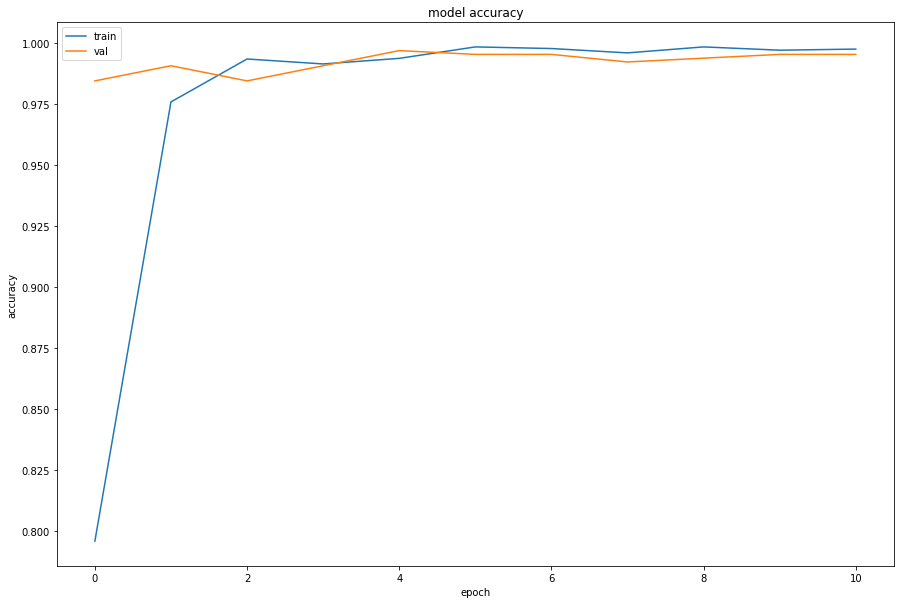

In [79]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

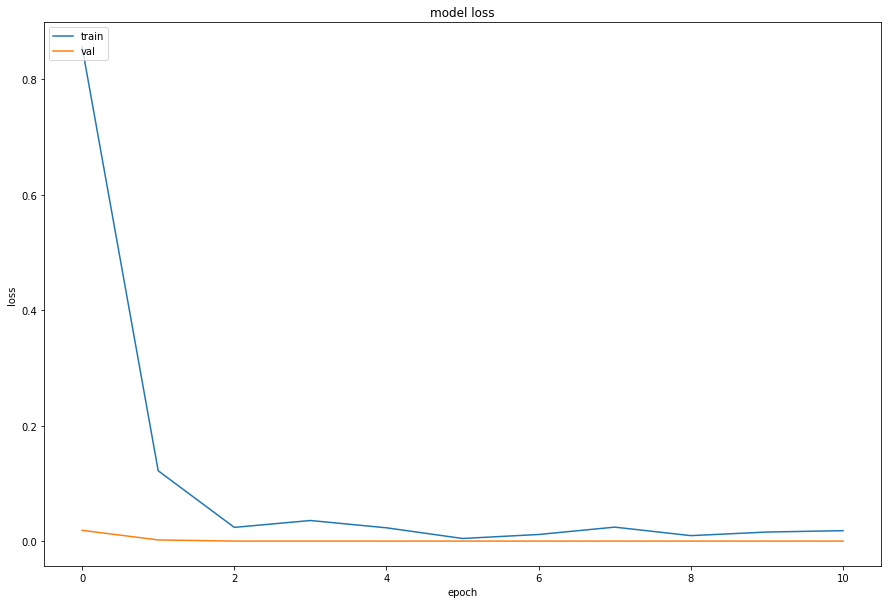

In [80]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# TODO

- Clean comments and text

